<a href="https://colab.research.google.com/github/sammainahkinya1404/A-novel-detection-method-based-on-DETR-for-drone-aerial-images/blob/main/Journal_articles_Topic_Modelling_Using_LDA_and_K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# !pip install matplotlib seaborn wordcloud pyLDAvis


In [2]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')


In [3]:
data=pd.read_csv("/content/drive/MyDrive/metadata.csv")
data.head()

,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,Microsoft Academic Paper ID,WHO #Covidence,has_pdf_parse,has_pmc_xml_parse,full_text_file,url
0,xqhn0vbp,1e1286db212100993d03cc22374b624f7caee956,PMC,Airborne rhinovirus detection and effect of ul...,10.1186/1471-2458-3-5,PMC140314,12525263.0,no-cc,"BACKGROUND: Rhinovirus, the most common cause ...",2003-01-13,"Myatt, Theodore A; Johnston, Sebastian L; Rudn...",BMC Public Health,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
1,gi6uaa83,8ae137c8da1607b3a8e4c946c07ca8bda67f88ac,PMC,Discovering human history from stomach bacteria,10.1186/gb-2003-4-5-213,PMC156578,12734001.0,no-cc,Recent analyses of human pathogens have reveal...,2003-04-28,"Disotell, Todd R",Genome Biol,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
2,le0ogx1s,NaN,PMC,A new recruit for the army of the men of death,10.1186/gb-2003-4-7-113,PMC193621,12844350.0,no-cc,"The army of the men of death, in John Bunyan's...",2003-06-27,"Petsko, Gregory A",Genome Biol,NaN,NaN,False,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1...
3,fy4w7xz8,0104f6ceccf92ae8567a0102f89cbb976969a774,PMC,Association of HLA class I with severe acute r...,10.1186/1471-2350-4-9,PMC212558,12969506.0,no-cc,BACKGROUND: The human leukocyte antigen (HLA) ...,2003-09-12,"Lin, Marie; Tseng, Hsiang-Kuang; Trejaut, Jean...",BMC Med Genet,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...
4,0qaoam29,5b68a553a7cbbea13472721cd1ad617d42b40c26,PMC,A double epidemic model for the SARS propagation,10.1186/1471-2334-3-19,PMC222908,12964944.0,no-cc,BACKGROUND: An epidemic of a Severe Acute Resp...,2003-09-10,"Ng, Tuen Wai; Turinici, Gabriel; Danchin, Antoine",BMC Infect Dis,NaN,NaN,True,True,custom_license,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC2...


In [4]:
data.columns

Index(['cord_uid', 'sha', 'source_x', 'title', 'doi', 'pmcid', 'pubmed_id',
       'license', 'abstract', 'publish_time', 'authors', 'journal',
       'Microsoft Academic Paper ID', 'WHO #Covidence', 'has_pdf_parse',
       'has_pmc_xml_parse', 'full_text_file', 'url'],
      dtype='object')

##Data Preprocessing
#1.data Cleaning

In [5]:
#List of unneccessary Column
columns_to_drop=['cord_uid', 'sha', 'source_x','doi', 'pmcid', 'pubmed_id',
       'license','Microsoft Academic Paper ID','WHO #Covidence','has_pdf_parse',
       'has_pmc_xml_parse', 'full_text_file', 'url','journal','publish_time','authors']

In [6]:
# dropping the list

new_data=data.drop(columns_to_drop,axis=1)

In [7]:
# viewing the cleaned dataset
new_data.head()

,title,abstract
0,Airborne rhinovirus detection and effect of ul...,"BACKGROUND: Rhinovirus, the most common cause ..."
1,Discovering human history from stomach bacteria,Recent analyses of human pathogens have reveal...
2,A new recruit for the army of the men of death,"The army of the men of death, in John Bunyan's..."
3,Association of HLA class I with severe acute r...,BACKGROUND: The human leukocyte antigen (HLA) ...
4,A double epidemic model for the SARS propagation,BACKGROUND: An epidemic of a Severe Acute Resp...


#2.Dealing with Null Values

In [8]:
# drop null values
new_df=new_data.dropna()


In [9]:
#Checking if Null Values Exists in New Dataset
new_df.isnull().sum()

title       0
abstract    0
dtype: int64

In [10]:
new_df.head()

,title,abstract
0,Airborne rhinovirus detection and effect of ul...,"BACKGROUND: Rhinovirus, the most common cause ..."
1,Discovering human history from stomach bacteria,Recent analyses of human pathogens have reveal...
2,A new recruit for the army of the men of death,"The army of the men of death, in John Bunyan's..."
3,Association of HLA class I with severe acute r...,BACKGROUND: The human leukocyte antigen (HLA) ...
4,A double epidemic model for the SARS propagation,BACKGROUND: An epidemic of a Severe Acute Resp...


#Text Preprocessing
##a.Removal of Stopwords
##b.Tokenization
##c.Lemmatization
##d.Stemming


In [10]:
# nltk Libraries
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer, PorterStemmer

In [11]:
# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [12]:
# Initialize objects for lemmatization and stemming
lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

In [13]:
#Text preprocesssing Function
def preprocess_text(text):
 # Tokenize the text

    tokens = word_tokenize(text.lower())

# Remove stop words

    filtered_tokens = [token for token in tokens if token not in stopwords.words('english')]

 # Lemmatize the tokens

    lemmatizer = WordNetLemmatizer()

    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in filtered_tokens]
# Stem the words
    stemmed_tokens = [stemmer.stem(token) for token in lemmatized_tokens]
# Join the processed tokens back into string
    processed_text = ' '.join(stemmed_tokens)
    return processed_text



In [14]:
#creating a  Dataset with 20k+ entries
new_data_40k = new_df.head(30000)

# Applying the preprocess_text function to all columns
new_data_40k['title'] = new_data_40k['title'].apply(preprocess_text)
new_data_40k['abstract'] = new_data_40k['abstract'].apply(preprocess_text)


In [15]:
new_data_40k.head()

,title,abstract
0,airborn rhinoviru detect effect ultraviolet ir...,"background : rhinoviru , common caus upper res..."
1,discov human histori stomach bacteria,recent analysi human pathogen reveal evolution...
2,new recruit armi men death,"armi men death , john bunyan 's memor phrase ,..."
3,associ hla class sever acut respiratori syndro...,background : human leukocyt antigen ( hla ) sy...
4,doubl epidem model sar propag,background : epidem sever acut respiratori syn...


#3.Feature Extraction using TF-IDF

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd

In [17]:
corpus = new_data_40k['title'].tolist() + new_data_40k['abstract'].tolist()

# Initialize TF-IDF vectorizer
tfidf_vectorizer = TfidfVectorizer()

# Fit and transform the corpus
tfidf_matrix = tfidf_vectorizer.fit_transform(corpus)

# Get the feature names (terms)
terms = tfidf_vectorizer.get_feature_names_out()

# Create DataFrame from TF-IDF matrix
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=terms)

# Rename columns based on their original source
df_tfidf.columns = ['title_' + col for col in df_tfidf.columns[:len(new_data['title'])]] + \
                   ['abstract_' + col for col in df_tfidf.columns[len(new_data['title']):len(new_data['title'])+len(new_data['abstract'])]]

#3.Topic Modelling
#a.HyperParameter Tuning (GridSearchCV)


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import LatentDirichletAllocation

# Define the parameter grid for grid search
param_grid = {'n_components': [5, 10, 15, 20]}

# Initialize LDA model
lda_model = LatentDirichletAllocation()

# Initialize GridSearchCV
grid_search = GridSearchCV(lda_model, param_grid, cv=3, n_jobs=-1)

# Fit GridSearchCV to TF-IDF matrix
grid_search.fit(tfidf_matrix)

# Print the best parameters and best score
print("Best Parameters: ", grid_search.best_params_)
print("Best Score: ", grid_search.best_score_)


Best Parameters:  {'n_components': 5}
Best Score:  -1007960.2040685817



#b.Latent Dirichlet Allocation LDA model




In [19]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model with the optimal number of topics
optimal_lda_model = LatentDirichletAllocation(n_components=5, random_state=42)

# Fit LDA to TF-IDF matrix
optimal_lda_output = optimal_lda_model.fit_transform(tfidf_matrix)


In [21]:
import numpy as np

# Function to display topics
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

#'tfidf_vectorizer' is the vectorizer used to create the 'tfidf_matrix'
tfidf_feature_names = tfidf_vectorizer.get_feature_names_out()

# Display the top 10 words for each topic
display_topics(optimal_lda_model, tfidf_feature_names, 10)


Topic 0:
de la angiotensin en et convert ang el le renin
Topic 1:
diseas health patient 19 covid infect case influenza outbreak emerg
Topic 2:
respiratori viru cov infect coronaviru detect human syndrom sars acut
Topic 3:
cell protein viru infect viral rna immun activ express mous
Topic 4:
appendix cheetah abbrevi und marin ciliari nephropathi cocain indigotica ptov


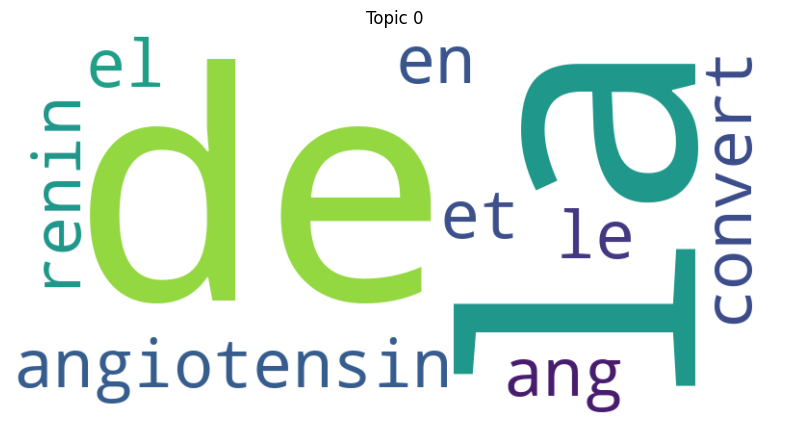

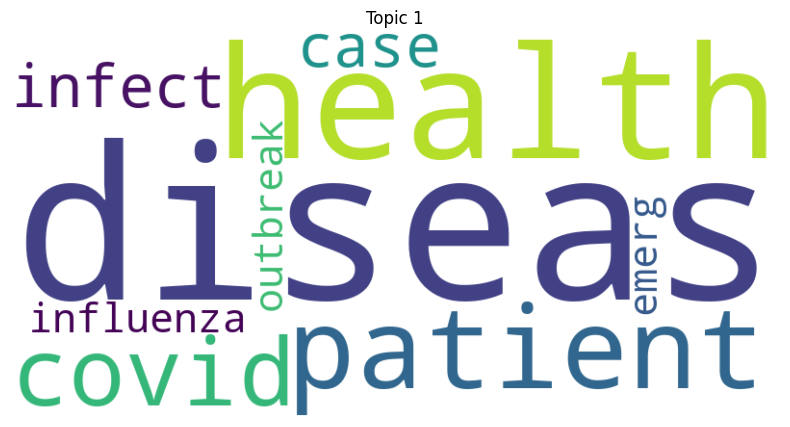

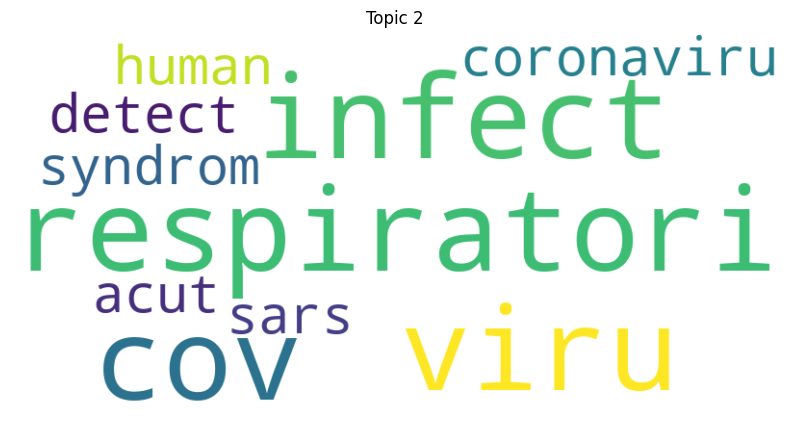

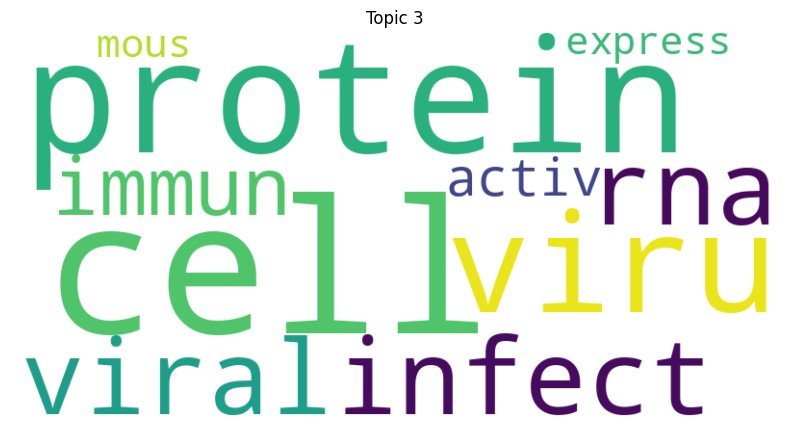

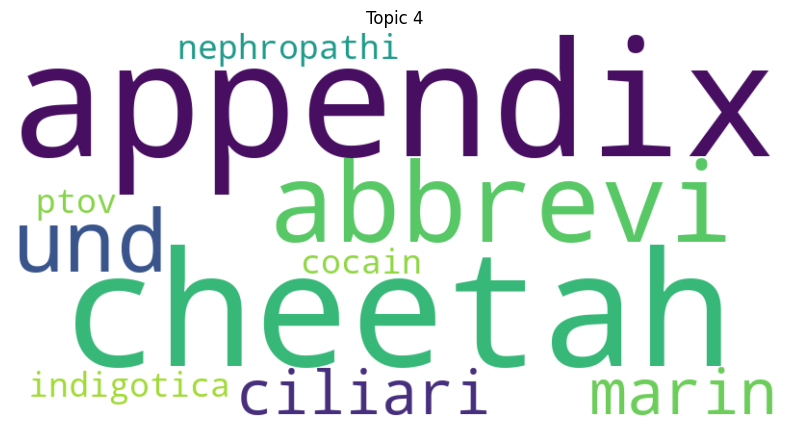

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create word clouds for each topic
def plot_word_clouds(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        wordcloud = WordCloud(
            width=800,
            height=400,
            background_color="white"
        ).generate(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f"Topic {topic_idx}")
        plt.show()

# Plot word clouds for each topic
plot_word_clouds(optimal_lda_model, tfidf_feature_names, 10)


#4.Topic Clustering using K-Means

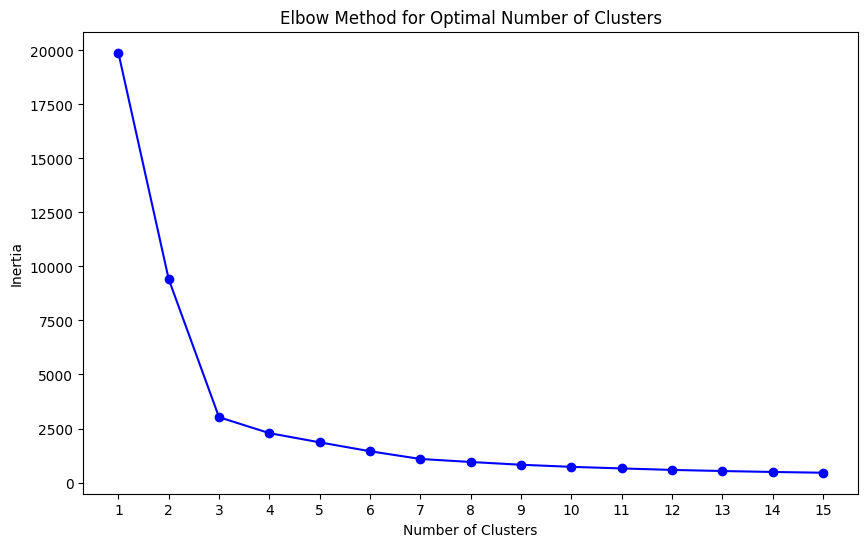

In [23]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Define range of clusters to try
max_clusters = 15
clusters_range = range(1, max_clusters + 1)

# Initialize list to store inertia values
inertia_values = []

# Calculate inertia for each cluster count
for num_clusters in clusters_range:
    kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans_model.fit(optimal_lda_output)
    inertia_values.append(kmeans_model.inertia_)

# Plot Elbow curve
plt.figure(figsize=(10, 6))
plt.plot(clusters_range, inertia_values, marker='o', linestyle='-', color='b')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.xticks(clusters_range)
plt.show()


#Applying K=3

In [24]:
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Initialize KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to LDA output
kmeans_model.fit(optimal_lda_output)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Assign cluster labels to original data
new_data_40k['cluster'] = cluster_labels[:30000]


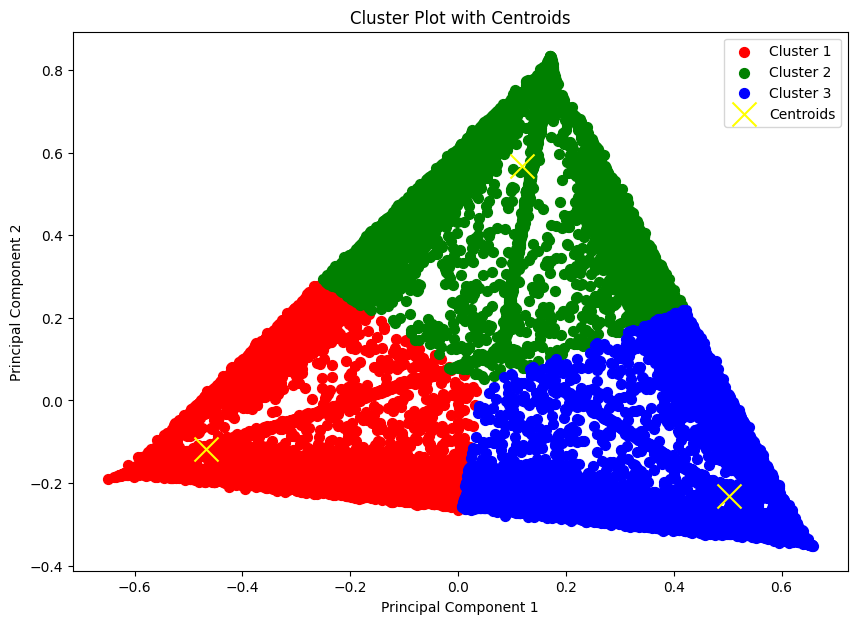

In [26]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Define the number of clusters
num_clusters = 3

# Initialize KMeans model
kmeans_model = KMeans(n_clusters=num_clusters, random_state=42)

# Fit KMeans to LDA output
kmeans_model.fit(optimal_lda_output)

# Get cluster labels
cluster_labels = kmeans_model.labels_

# Assign cluster labels to original data
new_data_40k['cluster'] = cluster_labels[:30000]

# Reduce dimensions for plotting
pca = PCA(n_components=2, random_state=42)
lda_output_2d = pca.fit_transform(optimal_lda_output)

# Get centroids in reduced dimensions
centroids_2d = pca.transform(kmeans_model.cluster_centers_)

# Plot the clusters
plt.figure(figsize=(10, 7))
colors = ['r', 'g', 'b']
for i in range(num_clusters):
    plt.scatter(lda_output_2d[cluster_labels == i, 0], lda_output_2d[cluster_labels == i, 1], s=50, c=colors[i], label=f'Cluster {i+1}')

# Plot the centroids
plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], s=300, c='yellow', marker='x', label='Centroids')

plt.title('Cluster Plot with Centroids')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()


# Representative documents

In [25]:
# Find the indices of the documents closest to each cluster centroid
import numpy as np

cluster_centroids = kmeans_model.cluster_centers_
closest_docs_to_centroid = []
for centroid in cluster_centroids:
    distances = np.linalg.norm(optimal_lda_output - centroid, axis=1)
    closest_doc_idx = np.argmin(distances)
    closest_docs_to_centroid.append(closest_doc_idx)

# Print the length of closest_docs_to_centroid
print("Length of closest_docs_to_centroid:", len(closest_docs_to_centroid))

# Check the length of new_data_40k
print("Length of new_data_40k:", len(new_data_40k))

# Print the titles or abstracts of the closest documents to each centroid
for i, idx in enumerate(closest_docs_to_centroid):
    print("Index:", idx)
    try:
        print("Cluster {}: {}".format(i, new_data_40k.iloc[idx]['title']))
        print("Cluster {}: {}".format(i, new_data_40k.iloc[idx]['abstract']))
    except IndexError:
        print("Index out of bounds. Skipping this entry.")
    print()

Length of closest_docs_to_centroid: 3
Length of new_data_40k: 30000
Index: 13345
Cluster 0: trend global warm evolut matrix protein 2 famili influenza viru
Cluster 0: global warm import factor affect biolog evolut , influenza import diseas threaten human possibl epidem pandem . studi , attempt analyz trend global warm evolut matrix protein 2 famili influenza viru , protein target anti-flu drug , mutat would signific effect resist anti-flu drug . evolut matrix protein 2 influenza viru 1959 2008 defin use unpredict portion amino-acid pair predict . trend evolut compar trend global temperatur , temperatur north south hemispher , temperatur influenza viru sampl site , speci carri influenza viru . result show similar trend global warm evolut m2 protein although could correl stage studi . studi suggest potenti impact global warm evolut protein influenza viru .

Index: 23627
Cluster 1: year genom
Cluster 1: small genom : sequenc , function character compar genom ( tigr scienc educ foundat con

#Visualize Cluster Characteristics

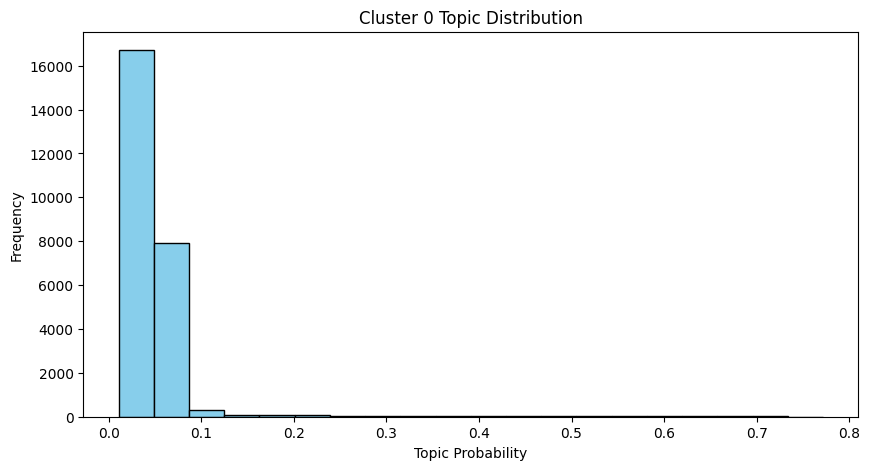

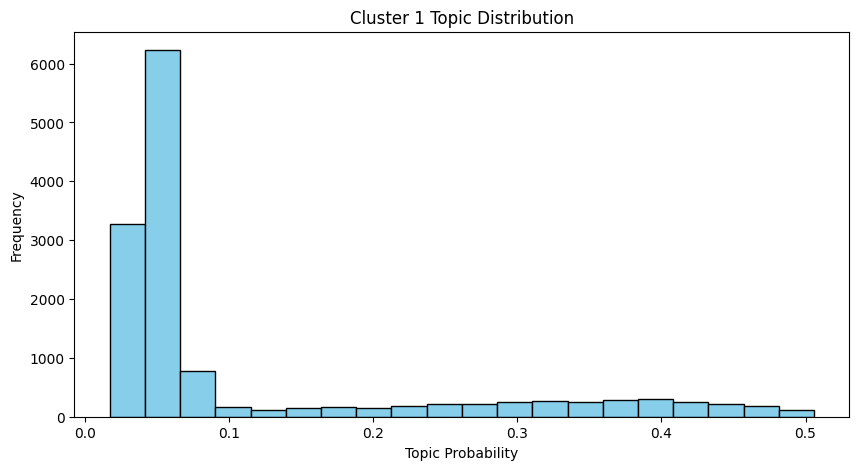

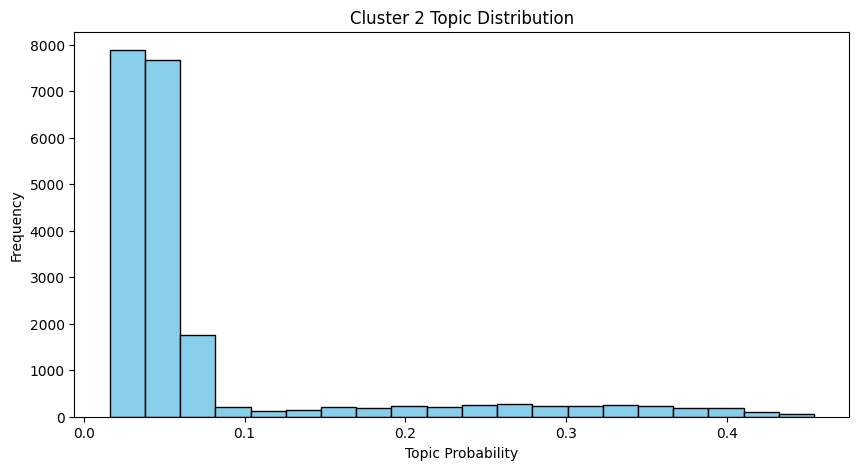

In [29]:
import matplotlib.pyplot as plt

for i in range(num_clusters):
    if i < optimal_lda_output.shape[1]:
        plt.figure(figsize=(10, 5))
        plt.hist(optimal_lda_output[cluster_labels == i][:, i], bins=20, color='skyblue', edgecolor='black')
        plt.title('Cluster {} Topic Distribution'.format(i))
        plt.xlabel('Topic Probability')
        plt.ylabel('Frequency')
        plt.show()

#Keyword Analysis

In [30]:
# Extract the top N significant keywords for each cluster
N = 5
top_keywords_per_cluster = {}
for i in range(num_clusters):
    cluster_docs = new_data_40k[new_data_40k['cluster'] == i]
    cluster_tfidf_matrix = tfidf_vectorizer.transform(cluster_docs['title'] + ' ' + cluster_docs['abstract'])
    cluster_term_scores = np.mean(cluster_tfidf_matrix, axis=0)
    top_indices = np.argsort(cluster_term_scores)[0, ::-1][:N]
    top_keywords = [str(terms[idx]) for idx in top_indices]
    top_keywords_per_cluster[i] = top_keywords
for cluster, keywords in top_keywords_per_cluster.items():
    keywords_string = ', '.join(keywords)
    print("Cluster {}: {}".format(cluster, keywords_string))

Cluster 0: [['diseas' 'health' 'patient' ... 'hab' 'haasnoot' 'jangra']]
Cluster 1: [['viru' 'infect' 'respiratori' ... 'matsui' 'matsuda' 'jangra']]
Cluster 2: [['cell' 'protein' 'viru' ... 'hgt' 'sandip' 'ﬁt']]


#Cluster Validation:Using Silhouette Score and Davies Bouldin Score


In [31]:
import warnings
warnings.filterwarnings('ignore')

In [32]:
from sklearn.metrics import silhouette_score


# Calculate silhouette score for the clustering
silhouette_avg = silhouette_score(optimal_lda_output, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.7072865501455603


In [33]:
from sklearn.metrics import davies_bouldin_score

# Calculate Davies-Bouldin index for the clustering
davies_bouldin_index = davies_bouldin_score(optimal_lda_output, cluster_labels)
print("Davies-Bouldin Index:", davies_bouldin_index)


Davies-Bouldin Index: 0.45342483560318475


In [34]:
new_data_40k.head()

,title,abstract,cluster
0,airborn rhinoviru detect effect ultraviolet ir...,"background : rhinoviru , common caus upper res...",1
1,discov human histori stomach bacteria,recent analysi human pathogen reveal evolution...,0
2,new recruit armi men death,"armi men death , john bunyan 's memor phrase ,...",0
3,associ hla class sever acut respiratori syndro...,background : human leukocyt antigen ( hla ) sy...,1
4,doubl epidem model sar propag,background : epidem sever acut respiratori syn...,0


#Interactive Visualization Using Plotly





In [35]:
from sklearn.decomposition import PCA
import plotly.express as px

# Visualize clusters in 2D using PCA and Plotly
pca_model = PCA(n_components=2, random_state=42)
pca_output = pca_model.fit_transform(optimal_lda_output)

cluster_labels_str = [str(label) for label in cluster_labels]

fig = px.scatter(x=pca_output[:, 0], y=pca_output[:, 1], color=cluster_labels_str)
fig.show()